## Task 1 -  Prediction using Supervised Machine Learning - Linear Regression Model

## Intern - Subhajit Saha
### Data Science & Business Analytics Internship at The Sparks Foundation
### GRIP - SEPT 2021

#### Problem Statement - Predict the percentage of an student based on the number of study hours.This is a simple linear regression                                              task as it involves just 2 variables.

#### Dataset link -:  http://bit.ly/w-data

### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

### Reading data from remote link

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [7]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis

**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.**

Text(0, 0.5, 'Percentage Score')

<Figure size 864x576 with 0 Axes>

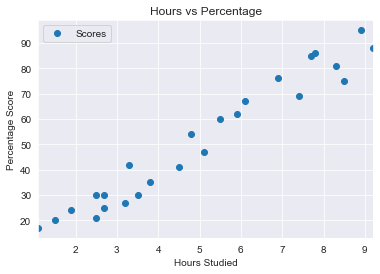

In [11]:
# Plotting the distribution of scores
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
# plt.show()

**Using heatmap to check if there is any null value or not**

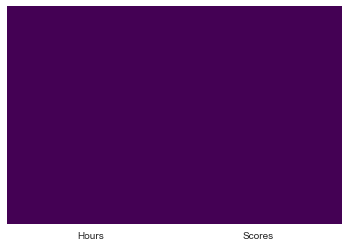

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# checking the correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


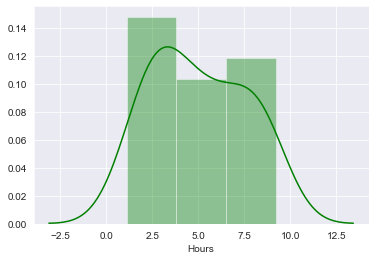

In [14]:
# distribution plot for data visualization
sns.distplot(data['Hours'],color='g', hist=True, kde=True);

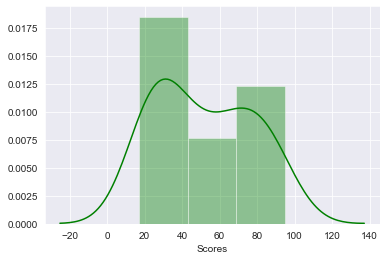

In [15]:
# distribution plot for data visualization
sns.distplot(data['Scores'],color='g', hist=True, kde=True);

### Jointplot

In [16]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

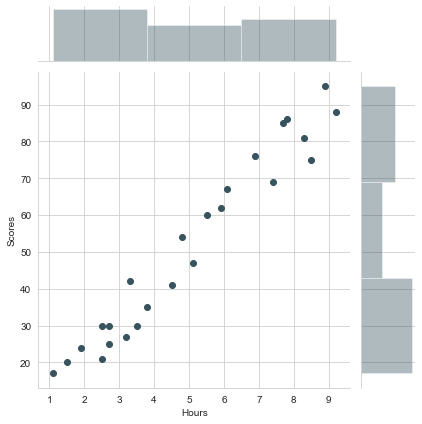

In [17]:
sns.jointplot(x='Hours',y='Scores',data=data)

### Pairplot

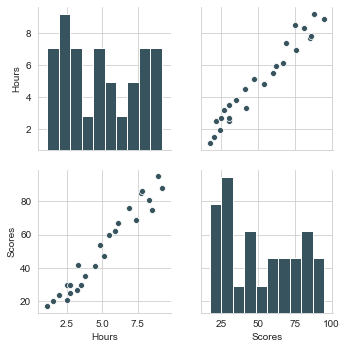

In [18]:
sns.pairplot(data)

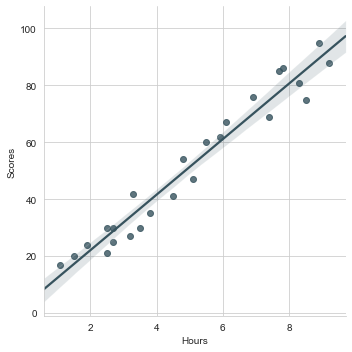

In [19]:
# lm plot
sns.lmplot(x='Hours',y='Scores',data=data)

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Preparing the data

***The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).***

## Feature and Label

In [20]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

## Train-Test Split

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

In [21]:
from sklearn.model_selection import train_test_split  

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42) 

## Training the Algorithm
**We have split our data into training and testing sets, and now is finally the time to train our algorithm.**

In [23]:
from sklearn.linear_model import LinearRegression 

In [24]:
regressor = LinearRegression()  

In [25]:
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


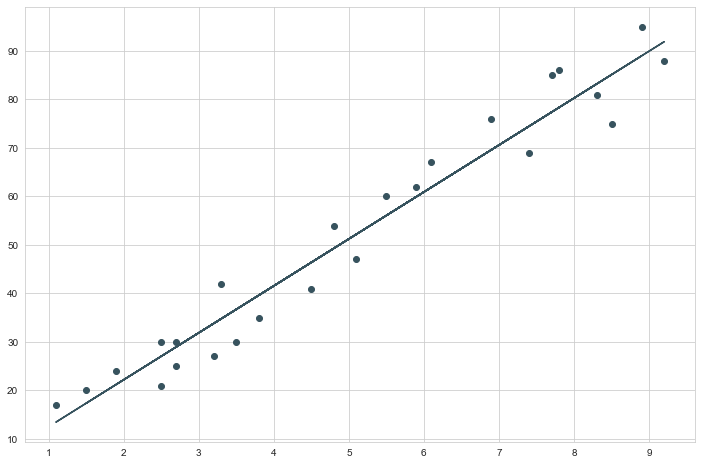

In [26]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(12,8))
plt.scatter(X, y)
plt.plot(X, line);
# plt.show()

**Print the coefficient of the model**

In [27]:
# The coefficient
print('Coefficient: \n', regressor.coef_)

Coefficient: 
 [9.68207815]


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [28]:
print(X_test) # Testing data - In Hours

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [29]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


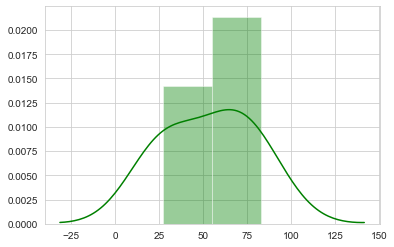

In [31]:
sns.set_style("whitegrid")
sns.distplot(y_pred,color='g', hist=True, kde=True,)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

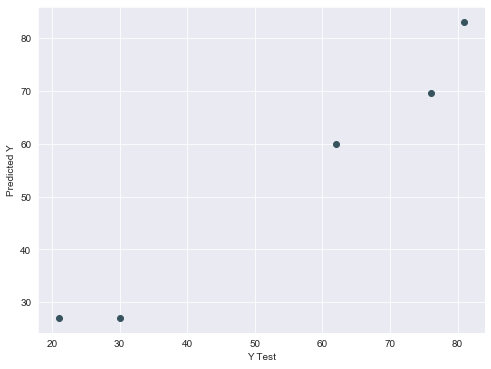

In [32]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### What will be the predicted score if a student studies 9.25 hrs/day

In [33]:
hours = 9.25
own_pred = regressor.predict([[hours]])

print('No of Hours studied by the student: 9.25')
print('Predicted Score for the student:', own_pred)

No of Hours studied by the student: 9.25
Predicted Score for the student: [92.38611528]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [34]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


### Checking the accuracy of model

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9678055545167994

## Completed